In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Read data

Source: http://www.astronexus.com/hyg

Additional reference: https://github.com/RobertoIA/Hertzsprung-Russell/blob/master/Hertzsprung-Russell.ipynb


In [2]:
df = pd.read_csv("hygdata_v3.csv.gz")
df.dropna(subset=['absmag','ci'],inplace=True) #deletes rows with NaN values for either absmag or ci

## Inspect the data

In [3]:
df.head()

,id,hip,hd,hr,gl,bf,proper,ra,dec,dist,...,bayer,flam,con,comp,comp_primary,base,lum,var,var_min,var_max
0,0,NaN,NaN,NaN,NaN,NaN,Sol,0.000000,0.000000,0.0000,...,NaN,NaN,NaN,1,0,NaN,1.000000,NaN,NaN,NaN
1,1,1.0,224700.0,NaN,NaN,NaN,NaN,0.000060,1.089009,219.7802,...,NaN,NaN,Psc,1,1,NaN,9.638290,NaN,NaN,NaN
2,2,2.0,224690.0,NaN,NaN,NaN,NaN,0.000283,-19.498840,47.9616,...,NaN,NaN,Cet,1,2,NaN,0.392283,NaN,NaN,NaN
3,3,3.0,224699.0,NaN,NaN,NaN,NaN,0.000335,38.859279,442.4779,...,NaN,NaN,And,1,3,NaN,386.901132,NaN,NaN,NaN
4,4,4.0,224707.0,NaN,NaN,NaN,NaN,0.000569,-51.893546,134.2282,...,NaN,NaN,Phe,1,4,NaN,9.366989,NaN,NaN,NaN


How many stars would be plotted?

In [4]:
len(df)

117732

How many columns are in this dataset? What are the column names?

In [5]:
len(df.columns)

37

In [6]:
df.columns

Index(['id', 'hip', 'hd', 'hr', 'gl', 'bf', 'proper', 'ra', 'dec', 'dist',
       'pmra', 'pmdec', 'rv', 'mag', 'absmag', 'spect', 'ci', 'x', 'y', 'z',
       'vx', 'vy', 'vz', 'rarad', 'decrad', 'pmrarad', 'pmdecrad', 'bayer',
       'flam', 'con', 'comp', 'comp_primary', 'base', 'lum', 'var', 'var_min',
       'var_max'],
      dtype='object')

## Plot

Define x and y as color index and absolute magnitude respectively.

In [7]:
x = df["ci"]
y = df["absmag"]

Plot

(20, -20)

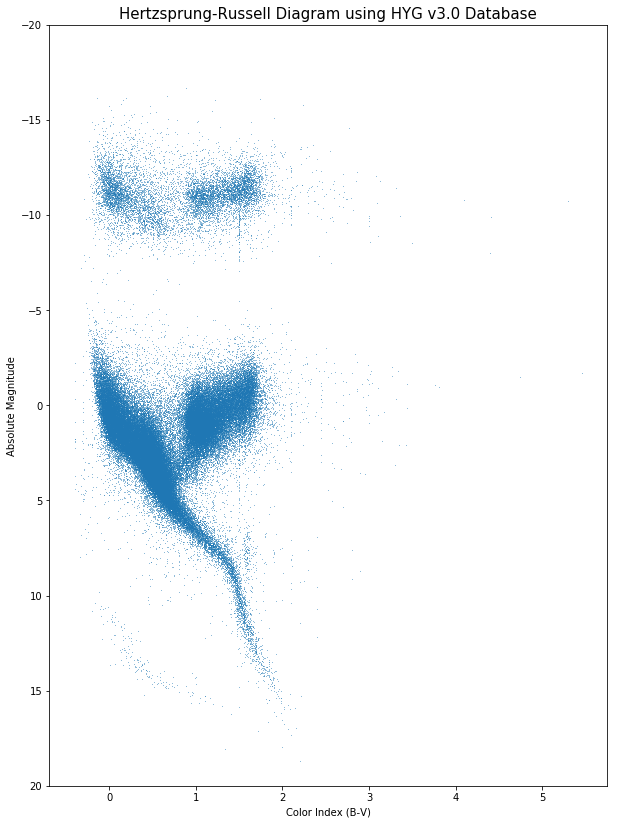

In [12]:
fig,ax = plt.subplots(figsize=(10, 14))


ax.set_title('Hertzsprung-Russell Diagram using HYG v3.0 Database', fontsize=15)
ax.set_xlabel('Color Index (B-V)')
ax.set_ylabel('Absolute Magnitude')

ax.scatter(x,y,marker='.',s=1.5,linewidth=0)


ax.set_ylim(20, -20)#reverses axis

See HR diagram labels [here](https://www.eso.org/public/images/eso0728c/)

Add colormap based on the color index of the star: blue for smaller ci/hotter stars, and red for higher ci/cooler stars. The list of colormaps are shown [here](https://matplotlib.org/users/colormaps.html). The one that has blue and red colors only is named `bwr`.

(20, -8)

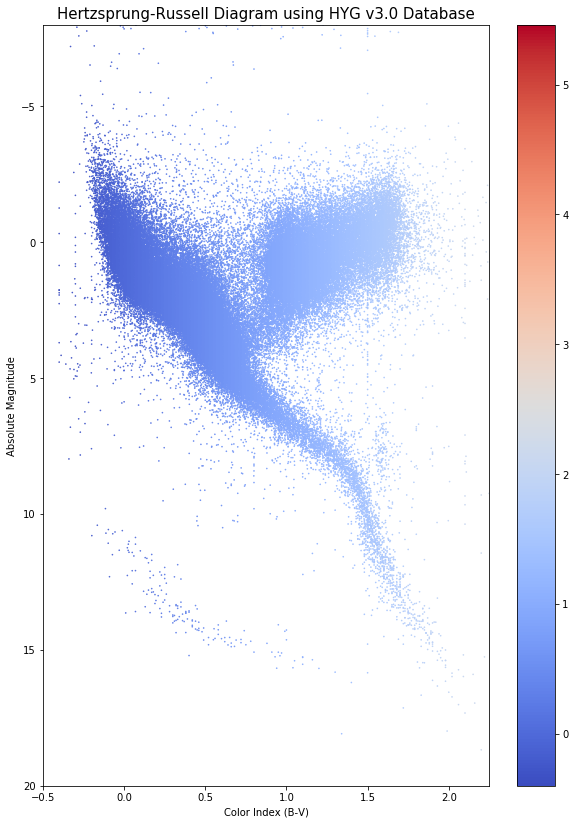

In [13]:
import matplotlib.cm as cmap

fig,ax = plt.subplots(figsize=(10, 14))

ax.set_title('Hertzsprung-Russell Diagram using HYG v3.0 Database', fontsize=15)
ax.set_xlabel('Color Index (B-V)')
ax.set_ylabel('Absolute Magnitude')

path = ax.scatter(x,y,marker='.',s=1.5,c=x,cmap='coolwarm')
plt.colorbar(path, ax=ax)

ax.set_xlim(-0.5, 2.25)
ax.set_ylim(20, -8)#reverses axis

The fact that only blue is shown in the plot tells us that most stars in the catalog have color index < 2. We can confirm by looking at the histogram/distribution of the color index of the stars.

In [14]:
min(x), max(x)

(-0.40000000000000002, 5.46)

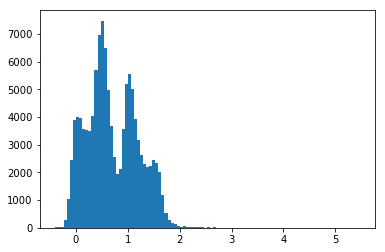

In [15]:
plt.hist(x, bins=100);

Yep, almost all have ci<2. So let's just plot ci<2 using pandas `query`.

In [16]:
df_masked = df.query('ci < 2')

Now use new x and y variables.

In [17]:
x_masked = df_masked['ci']
y_masked = df_masked['absmag']

(20, -8)

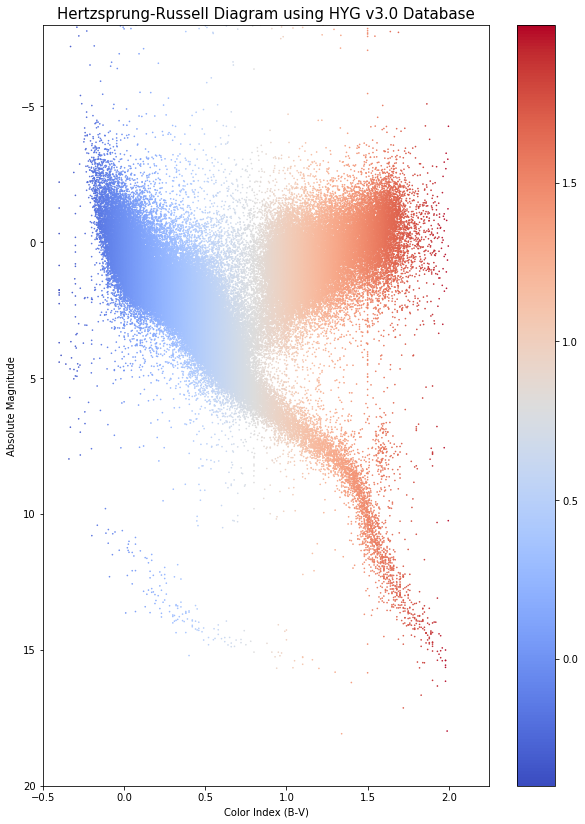

In [18]:
import matplotlib.cm as cmap

fig,ax = plt.subplots(figsize=(10, 14))

ax.set_title('Hertzsprung-Russell Diagram using HYG v3.0 Database', fontsize=15)
ax.set_xlabel('Color Index (B-V)')
ax.set_ylabel('Absolute Magnitude')

path = ax.scatter(x_masked,y_masked,marker='.',s=1.5,c=x_masked,cmap='coolwarm')
plt.colorbar(path, ax=ax)

ax.set_xlim(-0.5, 2.25)
ax.set_ylim(20, -8)#reverses axis

Hmm. Not bad. Now, let's try to add find where the well known stars are located and label them.

---

Check:

In [19]:
df.query('proper == "Sirius"')

,id,hip,hd,hr,gl,bf,proper,ra,dec,dist,...,bayer,flam,con,comp,comp_primary,base,lum,var,var_min,var_max
32263,32263,32349.0,48915.0,2491.0,Gl 244A,9Alp CMa,Sirius,6.752481,-16.716116,2.6371,...,Alp,9.0,CMa,1,32263,Gl 244,22.824433,NaN,-1.333,-1.523


Now, get list of stars with proper names. There is a table in wikipedia. Let's parse that table directly using pandas `read_html`.

In [20]:
html=pd.read_html("https://en.wikipedia.org/wiki/List_of_brightest_stars")

It will return a list of dataframes read from the link. Check the first table.

In [21]:
html[0].head()

,0,1,2,3,4
0,V Mag. (mV),Proper name,Bayer designation,Distance (ly),Spectral class
1,0.0002998732600000000000♠−26.74,Sun,NaN,0.000 015 813,G2 V
2,0.0012999853999999999999♠−1.46,Sirius,α CMa,0008.6,"A1 V, DA2"
3,0.0033000280000000000000♠−0.74,Canopus,α Car,0310,A9 II
4,0.0043000730000000000000♠−0.27 (0.01 + 1.33),Rigil Kentaurus,α Cen,0004.4,"G2 V, K1 V"


Use the first dataframe which has a column named "1" that contains the proper name.

In [22]:
names = html[0][1]

I will not include the first row because it has column names.

In [23]:
starnames = names[1:]

Now for each name in starnames, query it from df and `try` to plot. If there's a problem, then use `exception`. (Note we query in df not in df_masked!)

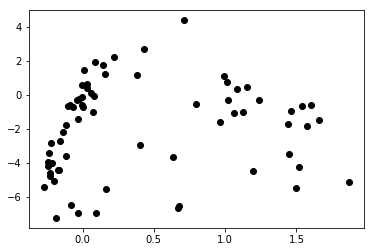

In [24]:
for name in starnames.values:
    df_star=df.query('proper == @name')
    yy = df_star['absmag'].values
    xx = df_star['ci'].values
    try:
        plt.plot(xx,yy,'ko')
    except:
        print('{} is not found'.format(name))

We can add labels to each one of them like so:

Sun is not found
Mimosa is not found
Elnath is not found
– is not found
Mirfak is not found
Alsephina[7] is not found
Tiaki[7] is not found
– is not found
Aspidiske is not found
Suhail is not found
Alphecca is not found
Eltanin is not found
Schedar is not found
Almach is not found
– is not found
– is not found
– is not found
– is not found
– is not found
Sabik is not found
Phecda is not found
Markeb[7] is not found
– is not found
Aljanah[7] is not found
Acrab is not found


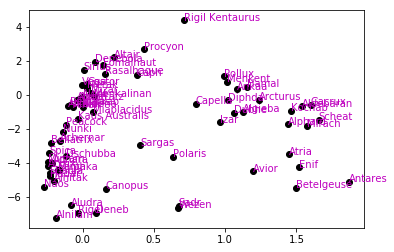

In [25]:
for name in starnames.values:
    df_star=df.query('proper == @name')
    yy = df_star['absmag'].values
    xx = df_star['ci'].values
    try:
        plt.plot(xx,yy,'ko')
        #add labels
        plt.text(xx[0],yy[0],s=name,color='m')
    except:
        print('{} is not found'.format(name))

Now, let's combine the two plots.

(20, -8)

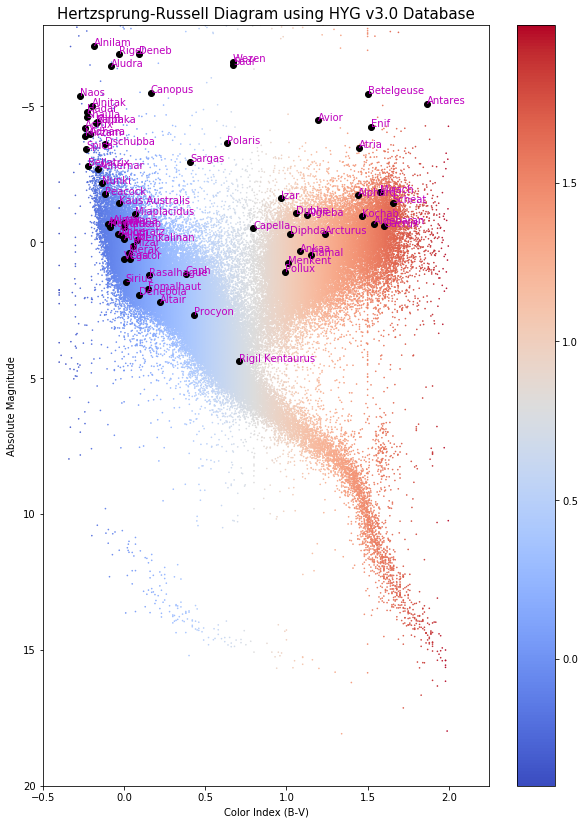

In [26]:
import matplotlib.cm as cmap

fig,ax = plt.subplots(figsize=(10, 14))

ax.set_title('Hertzsprung-Russell Diagram using HYG v3.0 Database', fontsize=15)
ax.set_xlabel('Color Index (B-V)')
ax.set_ylabel('Absolute Magnitude')

path = ax.scatter(x_masked,y_masked,marker='.',s=1.5,c=x_masked,cmap='coolwarm')
plt.colorbar(path, ax=ax)

#ADD STARS WITH PROPER NAMES
for name in starnames.values:
    df_star=df.query('proper == @name')
    yy = df_star['absmag'].values
    xx = df_star['ci'].values
    try:
        ax.plot(xx,yy,'ko')
        #add labels
        ax.text(xx[0],yy[0],s=name,color='m')
    except:
        pass
        #print('{} is not found'.format(name))

ax.set_xlim(-0.5, 2.25)
ax.set_ylim(20, -8)#reverses axis

We can do better by using a package named [adjust_text](https://github.com/Phlya/adjustText) that labels the name with proper spacing. You can install it using:

In [27]:
!pip install git+https://github.com/Phlya/adjustText

  Cloning https://github.com/Phlya/adjustText to /tmp/pip-4oi714ox-build


Don't forget to import it. Check the documentation how to use properly.

(20, -8)

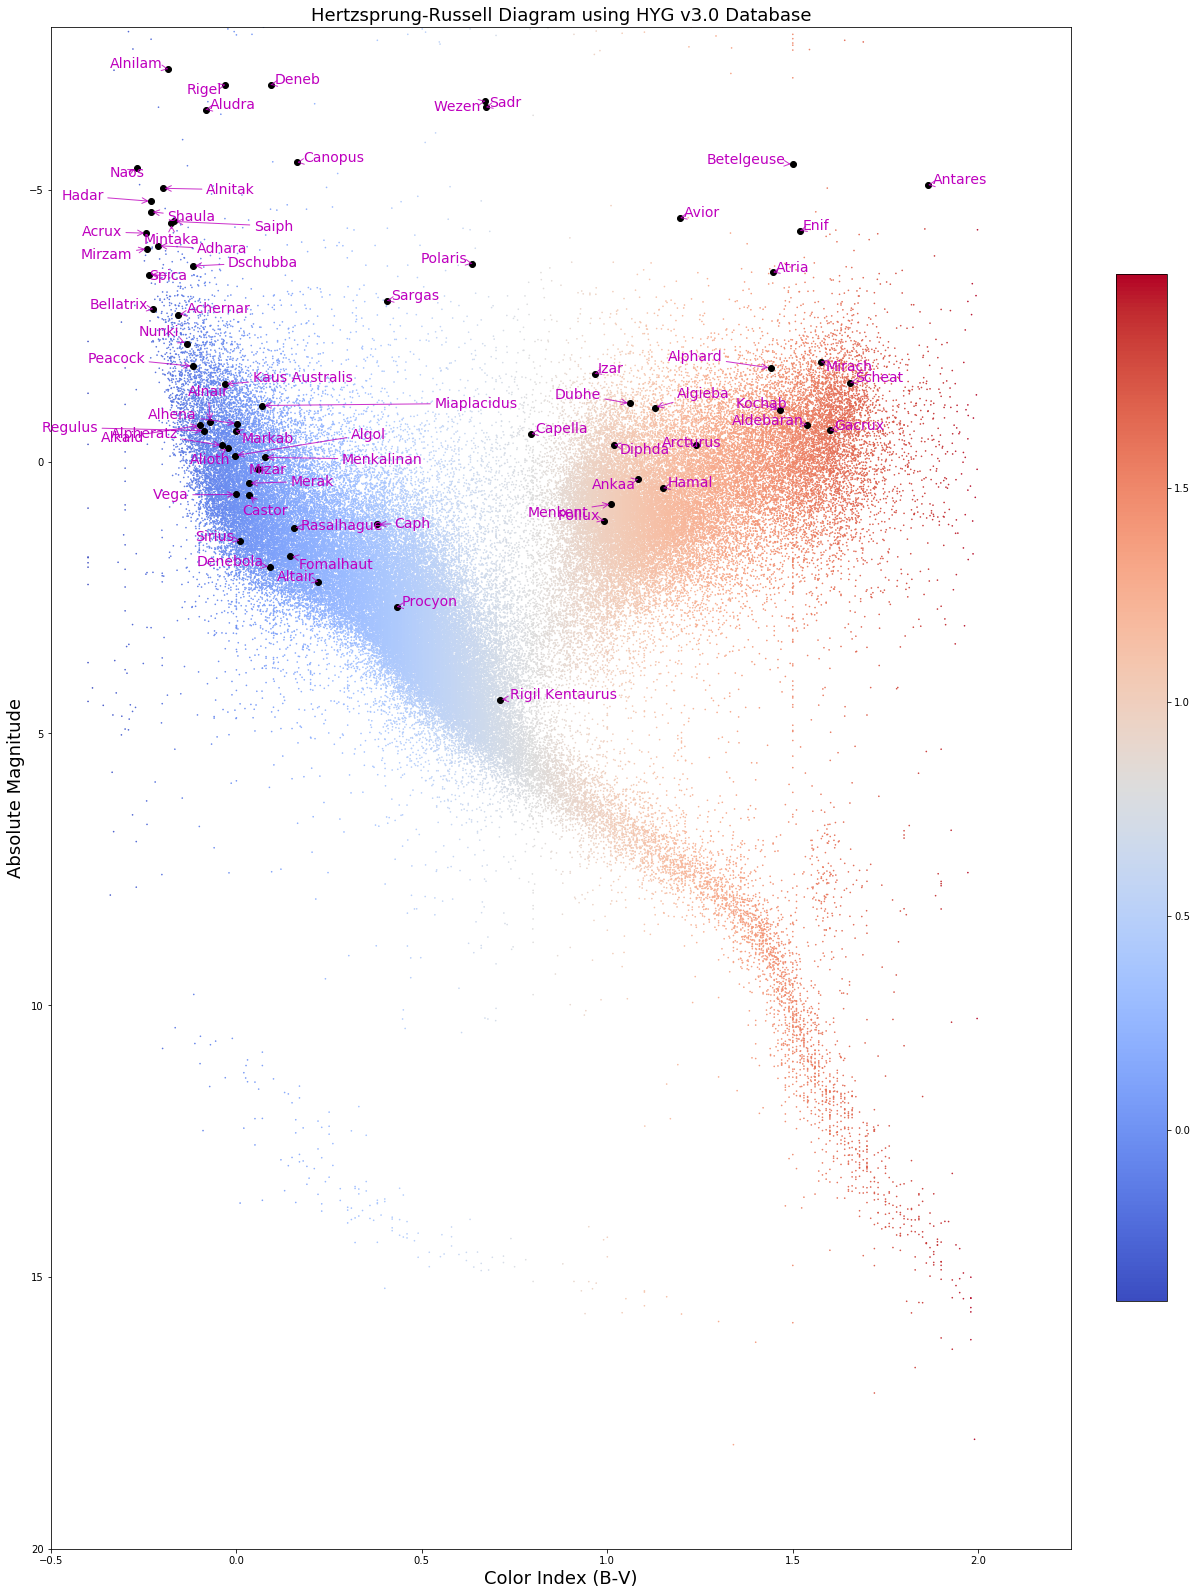

In [31]:
from adjustText import adjust_text

import matplotlib.cm as cmap

fig,ax = plt.subplots(figsize=(20, 28))

ax.set_title('Hertzsprung-Russell Diagram using HYG v3.0 Database', 
             fontsize=18)
ax.set_xlabel('Color Index (B-V)', fontsize=18)
ax.set_ylabel('Absolute Magnitude', fontsize=18)

path = ax.scatter(x_masked,y_masked,marker='.',s=1.5,c=x_masked,cmap='coolwarm')
plt.colorbar(path, ax=ax,fraction=0.046, pad=0.04)

#ADD STARS WITH PROPER NAMES
texts=[]

for name in starnames.values:
    df_star=df.query('proper == @name')
    yy = df_star['absmag'].values
    xx = df_star['ci'].values
    try:
        ax.plot(xx,yy,'ko')
        #add labels
        #ax.text(xx[0],yy[0],s=name,color='m')
        
        #instead of above, add this to make adjust_text work
        texts.append(plt.text(xx[0],yy[0],name,color='m',fontsize=14))
    except:
        pass
        #print('{} is not found'.format(name))
adjust_text(texts, arrowprops=dict(arrowstyle="->",
                                   color='m', 
                                   alpha=0.8))

ax.set_xlim(-0.5, 2.25)
ax.set_ylim(20, -8)#reverses axis

---

## Plotting with black background and white text 

with minor figsize adjustment

reference: http://sphinx-gallery.readthedocs.io/en/latest/auto_examples/sin_func/plot_sin_black_background.html

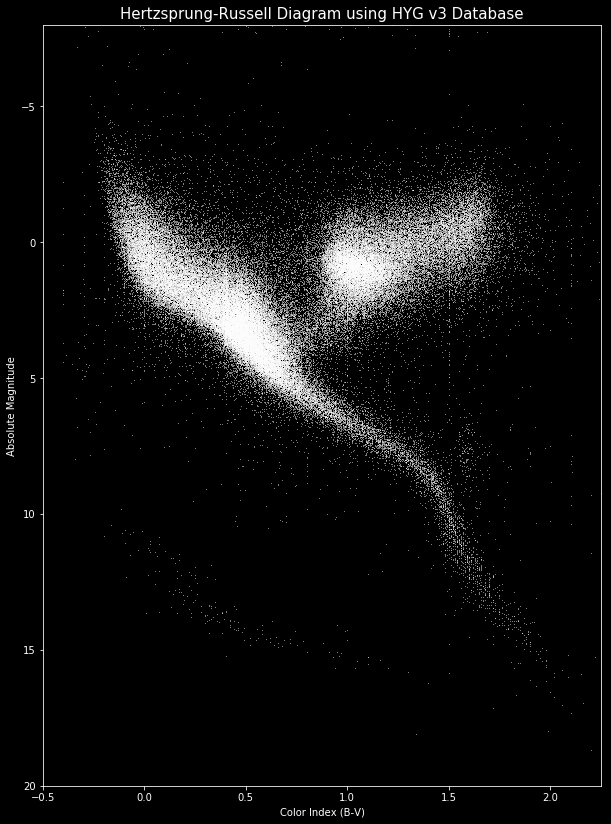

In [364]:
fig,ax = plt.subplots(figsize=(10, 14),facecolor='black')
#cm = plt.cm.get_cmap('RdBu_r')

ax.set_facecolor('black')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['bottom'].set_color('white')

ax.set_title('Hertzsprung-Russell Diagram using HYG v3 Database', color='white', fontsize=15)
ax.set_xlabel('Color Index (B-V)', color='white')
ax.set_ylabel('Absolute Magnitude', color='white')

#ax.scatter(x,y,marker='.',s=1.5,facecolors=x,linewidth=0, vmin=-0.5,vmax=2.5)
ax.scatter(x,y,marker='.',s=1.5,facecolors="white",linewidth=0)

ax.set_xlim(-0.5, 2.25)
ax.set_ylim(20, -8)#reverses axis
ax.tick_params(colors='white')

From https://github.com/RobertoIA/Hertzsprung-Russell/blob/master/Hertzsprung-Russell.ipynb

Convert ci to RGB

In [17]:
def bv2rgb(bv):
    t = (5000 / (bv + 1.84783)) + (5000 / (bv + .673913))
    x, y = 0, 0
    
    if 1667 <= t <= 4000:
        x = .17991 - (2.66124e8 / t**3) - (234358 / t**2) + (877.696 / t)
    elif 4000 < t:
        x = .24039 - (3.02585e9 / t**3) + (2.10704e6 / t**2) + (222.635 / t)
        
    if 1667 <= t <= 2222:
        y = (-1.1063814 * x**3) - (1.34811020 * x**2) + 2.18555832 * x - .20219683
    elif 2222 < t <= 4000:
        y = (-.9549476 * x**3) - (1.37418593 * x**2) + 2.09137015 * x - .16748867
    elif 4000 < t:
        y = (3.0817580 * x**3) - (5.87338670 * x**2) + 3.75112997 * x - .37001483
        
    X = 0 if y == 0 else x / y
    Z = 0 if y == 0 else (1 - x - y) / y
    
    r, g, b = np.dot([X, 1., Z],
        [[3.2406, -.9689, .0557], [-1.5372, 1.8758, -.204], [-.4986, .0415, 1.057]])
    
    R = np.clip(12.92 * r if (r <= 0.0031308) else 1.4 * (r**2 - .285714), 0, 1)
    G = np.clip(12.92 * g if (g <= 0.0031308) else 1.4 * (g**2 - .285714), 0, 1)
    B = np.clip(12.92 * b if (b <= 0.0031308) else 1.4 * (b**2 - .285714), 0, 1)
    
    return [R, G, B, np.random.ranf()]

color = df['ci'].apply(bv2rgb)

Plot

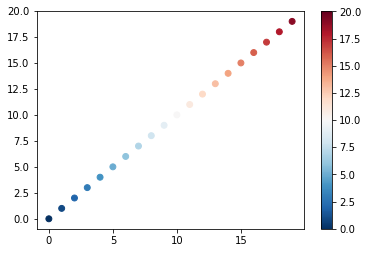

In [359]:
import matplotlib.pyplot as plt
cm = plt.cm.get_cmap('RdBu_r')
xy = range(20)
z = xy
sc = plt.scatter(xy, xy, c=z, vmin=0, vmax=20, s=35, cmap=cm)
plt.colorbar(sc)
plt.show()

In [20]:
np.array(df["ci"])

array([ 0.656,  0.482,  0.999, ...,  1.87 ,  1.64 ,  0.07 ])

## Annotate Stars

Sun

In [56]:
df[df["proper"]=="Sol"][["ci","absmag"]]

,ci,absmag
0,0.656,4.85


Procyon

In [115]:
df[df["proper"]=="Procyon"]

,id,hip,hd,hr,gl,bf,proper,ra,dec,dist,...,bayer,flam,con,comp,comp_primary,base,lum,var,var_min,var_max
37173,37173,37279.0,61421.0,2943.0,Gl 280A,10Alp CMi,Procyon,7.655033,5.224993,3.5142,...,Alp,10.0,CMi,1,37173,Gl 280,7.440464,NaN,NaN,NaN


In [84]:
df[df["proper"]=="Procyon"][["ci","absmag"]]

,ci,absmag
37173,0.432,2.671


Aldebaran

In [80]:
df[df["proper"]=="Aldebaran"][["ci","absmag"]]

,ci,absmag
21368,1.538,-0.682


Betelgeuse

In [81]:
df[df["proper"]=="Betelgeuse"][["ci","absmag"]]

,ci,absmag
27919,1.5,-5.469


Sirius A

In [86]:
df[df["proper"]=="Sirius"][["ci","absmag"]]

,ci,absmag
32263,0.009,1.454


40 Eridani A

In [265]:
df[df["hd"]==26965][["ci","absmag"]]

,ci,absmag
19799,0.82,5.942


40 Eridani B

In [262]:
df[df["hd"]==26976][["ci","absmag"]]

,ci,absmag
118280,0.03,11.006


Regulus

In [87]:
df[df["proper"]=="Regulus"][["ci","absmag"]]

,ci,absmag
49528,-0.087,-0.569


Rigel

In [96]:
df[df["proper"]=="Rigel"][["ci","absmag"]]

,ci,absmag
24378,-0.03,-6.933


Alpha Centauri A

In [227]:
df[df["proper"]=="Rigil Kentaurus"][["ci","absmag"]]

,ci,absmag
71456,0.71,4.379


Alpha Centauri B

In [228]:
df[df["hd"]==128621][["ci","absmag"]]

,ci,absmag
71453,0.9,5.739


Proxima Centauri

In [90]:
df[df["proper"]=="Proxima Centauri"][["ci","absmag"]]

,ci,absmag
70666,1.807,15.447


Polaris

In [97]:
df[df["proper"]=="Polaris"][["ci","absmag"]]

,ci,absmag
11734,0.636,-3.643


Arcturus

In [109]:
df[df["proper"]=="Arcturus"][["ci","absmag"]]

,ci,absmag
69451,1.239,-0.307


Lalande 21185

In [252]:
df[df["hd"]==95735][["ci","absmag"]]

,ci,absmag
53879,1.502,10.46


GJ 440

In [285]:
df[df["hip"]==57367][["ci","absmag"]]

,ci,absmag
57194,0.196,13.182


Gliese 293

In [294]:
df[df["gl"]=="Gl 293"][["ci","absmag"]]

,ci,absmag
118508,0.66,14.882


Pollux

In [296]:
df[df["proper"]=="Pollux"][["ci","absmag"]]

,ci,absmag
37718,0.991,1.084


Antares

In [297]:
df[df["proper"]=="Antares"][["ci","absmag"]]

,ci,absmag
80519,1.865,-5.089


Deneb

In [298]:
df[df["proper"]=="Deneb"][["ci","absmag"]]

,ci,absmag
101767,0.092,-6.932


Barnard's Star

In [299]:
df[df["proper"]=="Barnard's Star"][["ci","absmag"]]

,ci,absmag
87665,1.57,13.235


Gacrux

In [306]:
df[df["proper"]=="Gacrux"][["ci","absmag"]]

,ci,absmag
60893,1.6,-0.579


Mira

In [309]:
df[df["proper"]=="Mira"][["ci","absmag"]]

,ci,absmag
10800,0.966,1.659


Bellatrix

In [310]:
df[df["proper"]=="Bellatrix"][["ci","absmag"]]

,ci,absmag
25273,-0.224,-2.804


Vega

In [327]:
df[df["proper"]=="Vega"][["ci","absmag"]]

,ci,absmag
90979,-0.001,0.604


Canopus

In [330]:
df[df["proper"]=="Canopus"][["ci","absmag"]]

,ci,absmag
30365,0.164,-5.504


61 Cygni A

In [335]:
df[df["hip"]==104214][["ci","absmag"]]

,ci,absmag
103879,1.069,7.488


61 Cygni B

In [336]:
df[df["hip"]==104217][["ci","absmag"]]

,ci,absmag
103883,1.309,8.331


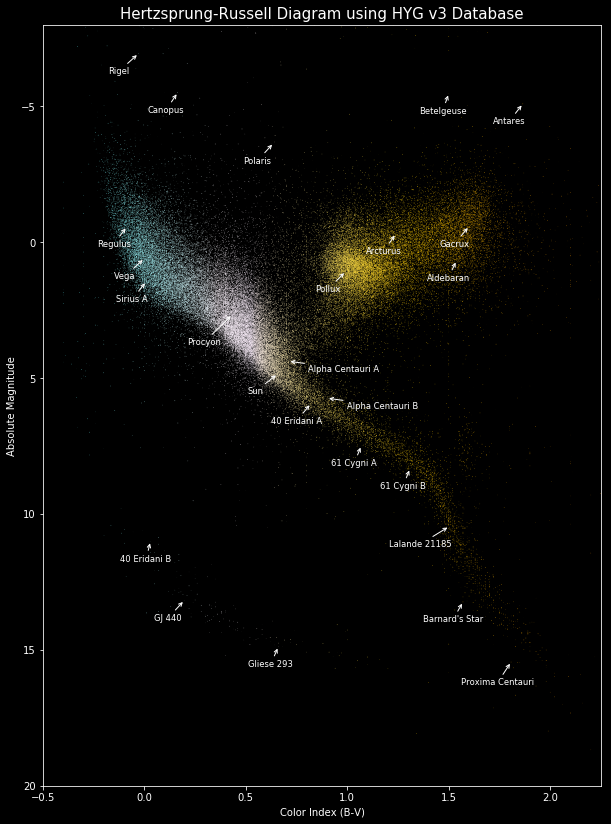

In [337]:
fig,ax = plt.subplots(figsize=(10, 14),facecolor='black')

ax.set_facecolor('black')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['bottom'].set_color('white')

ax.set_title('Hertzsprung-Russell Diagram using HYG v3 Database', color='white', fontsize=15)
ax.set_xlabel('Color Index (B-V)', color='white')
ax.set_ylabel('Absolute Magnitude', color='white')

ax.scatter(x,y,marker='.',s=1.5,facecolors=color,linewidth=0)

ax.set_xlim(-0.5, 2.25)
ax.set_ylim(20, -8)#reverses axis
ax.tick_params(colors='white')


#Sun
ax.annotate(
    'Sun', xy=(0.656 ,4.85), xycoords='data',
    fontsize='small', color='white',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))

#Procyon
ax.annotate(
    'Procyon', xy=(0.432 ,2.671), xycoords='data',
    fontsize='small', color='white',
    xytext=(-45, -30), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))

#Aldebaran
ax.annotate(
    'Aldebaran', xy=(1.538 ,0.682), xycoords='data',
    fontsize='small', color='white',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))

#Betelgeuse
ax.annotate(
    'Betelgeuse', xy=(1.5 ,-5.469), xycoords='data',
    fontsize='small', color='white',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))

#Sirius A
ax.annotate(
    'Sirius A', xy=(0.009 ,1.454), xycoords='data',
    fontsize='small', color='white',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))

#40 Eridani A
ax.annotate(
    '40 Eridani A', xy=(0.82 ,5.942), xycoords='data',
    fontsize='small', color='white',
    xytext=(-40, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))

#40 Eridani B
ax.annotate(
    '40 Eridani B', xy=(0.03 ,11.006), xycoords='data',
    fontsize='small', color='white',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))


#Regulus
ax.annotate(
    'Regulus', xy=(-0.087 ,-0.569), xycoords='data',
    fontsize='small', color='white',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))


#Rigel
ax.annotate(
    'Rigel', xy=(-0.03 ,-6.933), xycoords='data',
    fontsize='small', color='white',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))

#Alpha Centauri A
ax.annotate(
    'Alpha Centauri A', xy=(0.71 ,4.379), xycoords='data',
    fontsize='small', color='white',
    xytext=(20, -10), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))

#Alpha Centauri B
ax.annotate(
    'Alpha Centauri B', xy=(0.9 ,5.739), xycoords='data',
    fontsize='small', color='white',
    xytext=(20, -10), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))


#Proxima Centauri
ax.annotate(
    'Proxima Centauri', xy=(1.807 ,15.447), xycoords='data',
    fontsize='small', color='white',
    xytext=(-50, -25), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'),
    horizontalalignment='left',
    verticalalignment='bottom')


#Polaris
ax.annotate(
    'Polaris', xy=(0.636,-3.643), xycoords='data',
    fontsize='small', color='white',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))

#Arcturus
ax.annotate(
    'Arcturus', xy=(1.239 ,-0.307), xycoords='data',
    fontsize='small', color='white',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))

#Lalande 21185
ax.annotate(
    'Lalande 21185', xy=(1.502 ,10.46), xycoords='data',
    fontsize='small', color='white',
    xytext=(-60, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))

#GJ 440
ax.annotate(
    'GJ 440', xy=(0.196 ,13.182), xycoords='data',
    fontsize='small', color='white',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))

#Gliese 293
ax.annotate(
    'Gliese 293', xy=(0.66 ,14.882), xycoords='data',
    fontsize='small', color='white',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))


#Pollux
ax.annotate(
    'Pollux', xy=(0.991 ,1.084), xycoords='data',
    fontsize='small', color='white',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))

#Antares
ax.annotate(
    'Antares', xy=(1.865 ,-5.089), xycoords='data',
    fontsize='small', color='white',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))



#Barnard's Star
ax.annotate(
    "Barnard's Star", xy=(1.57 ,13.235), xycoords='data',
    fontsize='small', color='white',
    xytext=(-40, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))


#Gacrux
ax.annotate(
    "Gacrux", xy=(1.6 ,-0.579), xycoords='data',
    fontsize='small', color='white',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))



#Vega
ax.annotate(
    "Vega", xy=(-0.001 ,0.604), xycoords='data',
    fontsize='small', color='white',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))


#Canopus
ax.annotate(
    "Canopus", xy=(0.164 ,-5.504), xycoords='data',
    fontsize='small', color='white',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))


#61 Cygni A
ax.annotate(
    "61 Cygni A", xy=(1.069 ,7.488), xycoords='data',
    fontsize='small', color='white',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))


#61 Cygni B
ax.annotate(
    "61 Cygni B", xy=(1.309 ,8.331), xycoords='data',
    fontsize='small', color='white',
    xytext=(-30, -20), textcoords='offset points',
    arrowprops=dict(
        arrowstyle="->",
        color='white'))